In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [3]:
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "type"]
dataset = pd.read_csv("../iris.csv", skiprows=1, names=col_names, header=None)
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [4]:
##Giving numbers to different types
types = dataset['type']

label_encoder = LabelEncoder()
# Fit and transform the 'type' column
encoded_types = label_encoder.fit_transform(types)

# Replace the original 'type' column with the encoded values
dataset['type'] = encoded_types

print(dataset['type'].unique())

[0 1 2]


In [5]:
X =dataset.iloc[:,: -1]
y = dataset.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier

#my classifier
clf = RandomForestClassifier(min_samples_split=3,
                             random_state=42,
                             criterion = "gini", # {“gini”, “entropy”, “log_loss”}
                             max_features="sqrt" # {“sqrt”, “log2”, None}
                             )
clf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=3, random_state=42)

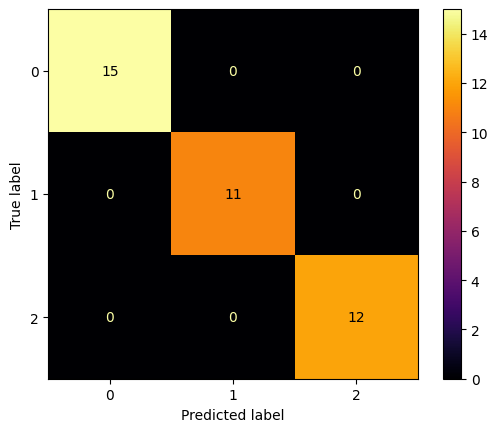

Precision: 1.0000
f1: 1.0000
Sensitivity (Recall): 1.0000


In [8]:
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
def plot_confusion_mat(ml_model,x_test1,y_test1):
    predictions = ml_model.predict(x_test1)
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot( cmap='inferno')
    plt.show()
    # Calculate precision, accuracy, and sensitivity
    precision = precision_score(y_test1, predictions,average='micro')
    recall  = recall_score(y_test1, predictions,average='micro')
    f1  = f1_score(y_test1, predictions,average='micro')

    print(f'Precision: {precision:.4f}')
    print(f'f1: {f1:.4f}')
    print(f'Sensitivity (Recall): {recall:.4f}')
plot_confusion_mat(clf,X_test,y_test)